In [106]:
import sys
import os

sys.path.append(os.path.dirname(os.getcwd()))

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [107]:
maze_data_loc = "Statistics/metric.csv"
additional_maze_data_loc = "Statistics/additional_metrics.csv"

maze_colors = {
    'Aldous Broder': '#1f77b4',   
    'Hunt and Kill': '#ff7f0e',     
    'Loop Hunt and Kill': '#c49c94',  
    'Initialized Prim\'s': '#2ca02c', 
    'Depth First Prim\'s': '#d62728',        
    'Randomized Kruskal\'s': '#9467bd',
    'Sidewinder': '#8c564b',      
    'Stochastic Prim\'s': '#e377c2',  
    'Wilson\'s': '#7f7f7f',          
    'Randomized Prim\'s': '#bcbd22',
    'Loop Prim': '#17becf',
    'Recursive Backtracker': '#aec7e8',
    'Randomized DFS': '#ff9896'
}

metric_df = pd.read_csv(maze_data_loc)
metric_df = metric_df.sort_values(by= ["Maze Type", "Size"]).reset_index(drop=True)

additional_maze_df = pd.read_csv(additional_maze_data_loc)
additional_maze_df = additional_maze_df.sort_values(by = ["Maze Type", "Size"]).reset_index(drop=True)

metric_df["Avg Intersection Degree"] = additional_maze_df["Avg Intersection Degree"]
metric_df["Avg Distance to Deadend(From Solution Path) Tortuosity"] = additional_maze_df["Avg Distance to Deadend(From Solution Path) Tortuosity"]

metric_df.head()

,Maze Type,Size,# of Intersections,Solution Length,Shortest Possible Solution,Solution Path Tortuosity,# of Deadends,Deadend Crossroads,Avg Distance to Deadend(From Solution Path),Max Distance to Deadend(From Solution Path),Avg Distance to Deadend(From Intersection),Tempting Count,Avg Intersection Degree,Avg Distance to Deadend(From Solution Path) Tortuosity
0,Aldous Broder,25x25,159,82,48,1.71,183,105,36.01,91,38.89,52,3.13,3.10
1,Aldous Broder,25x25,170,156,48,3.25,189,110,60.35,175,60.30,88,3.12,3.47
2,Aldous Broder,25x25,152,68,48,1.42,174,83,37.68,105,41.73,35,3.15,2.05
3,Aldous Broder,25x25,163,74,48,1.54,184,104,36.71,87,40.89,45,3.12,2.60
4,Aldous Broder,25x25,148,60,48,1.25,176,107,41.45,114,47.15,29,3.13,2.87


In [108]:
loop_data_loc = "Statistics/loop_metric.csv"

loop_df = pd.read_csv(loop_data_loc)
randomized_prim_df = metric_df[metric_df['Maze Type'] == 'Randomized Prim\'s'].copy()
randomized_prim_df["Maze Type"] = "Loop Prim"
randomized_prim_df["Loop Density"] = 0

hunt_and_kill_df = metric_df[metric_df['Maze Type'] == 'Hunt and Kill'].copy()
hunt_and_kill_df["Maze Type"] = "Loop Hunt and Kill"
hunt_and_kill_df["Loop Density"] = 0

loop_df = pd.concat([loop_df, randomized_prim_df, hunt_and_kill_df], ignore_index=True)

loop_df.head(5)

,Maze Type,Size,Loop Density,# of Intersections,Solution Length,Shortest Possible Solution,Solution Path Tortuosity,# of Deadends,Deadend Crossroads,Avg Distance to Deadend(From Solution Path),Max Distance to Deadend(From Solution Path),Avg Distance to Deadend(From Intersection),Tempting Count,Avg Intersection Degree,Avg Distance to Deadend(From Solution Path) Tortuosity
0,Loop Hunt and Kill,25x25,0.01,63,122,48,2.54,60,18,72.55,189,76.30,18,NaN,NaN
1,Loop Prim,25x25,0.01,184,50,48,1.04,204,132,26.06,59,28.88,40,NaN,NaN
2,Loop Hunt and Kill,25x25,0.01,58,84,48,1.75,53,15,63.95,134,74.35,15,NaN,NaN
3,Loop Prim,25x25,0.01,170,52,48,1.08,203,114,39.87,95,33.98,37,NaN,NaN
4,Loop Hunt and Kill,25x25,0.01,59,98,48,2.04,57,17,65.65,168,64.42,20,NaN,NaN


In [109]:
solution_data_loc = "Statistics/solution.csv"

solver_colors = {
    'A*': '#1f77b4',
    'BFS': '#ff7f0e',
    'DFS': '#2ca02c',
    'HandOnWall': '#d62728',
    'HybridBFSDFS': '#9467bd',
    'RandomWalk': '#8c564b'}

solution_df = pd.read_csv(solution_data_loc)
solution_df.head(6)

,Maze Type,Size,Solver,Visited Nodes,Solution Path Length,Excess Steps,Exploration Ratio,Visited Dead Ends,Visited Intersections,Dead End Coverage,Intersection Coverage
0,Aldous Broder,25x25,A*,517,76,441,5.802632,143,139,0.79,0.89
1,Aldous Broder,25x25,BFS,600,76,524,6.894737,172,152,0.95,0.97
2,Aldous Broder,25x25,DFS,235,76,159,2.092105,67,67,0.37,0.43
3,Aldous Broder,25x25,HandOnWall,268,76,192,2.526316,65,74,0.36,0.47
4,Aldous Broder,25x25,HybridBFSDFS,467,76,391,5.144737,124,125,0.69,0.80
5,Aldous Broder,25x25,RandomWalk,168,76,92,1.210526,40,52,0.22,0.33


In [110]:
loop_solution_data_loc = "Statistics/loop_solution.csv"

loop_solution_df = pd.read_csv(loop_solution_data_loc)

randomized_prim_solution_df = solution_df[solution_df['Maze Type'] == 'Randomized Prim\'s'].copy()
randomized_prim_solution_df["Maze Type"] = "Loop Prim"
randomized_prim_solution_df["Loop Density"] = 0
randomized_prim_solution_df = randomized_prim_solution_df[randomized_prim_solution_df["Solver"] != "HandOnWall"]

hunt_and_kill_solution_df = solution_df[solution_df['Maze Type'] == 'Hunt and Kill'].copy()
hunt_and_kill_solution_df["Maze Type"] = "Loop Hunt and Kill"
hunt_and_kill_solution_df["Loop Density"] = 0
hunt_and_kill_solution_df = hunt_and_kill_solution_df[hunt_and_kill_solution_df["Solver"] != "HandOnWall"]

loop_solution_df = pd.concat([loop_solution_df, randomized_prim_solution_df, hunt_and_kill_solution_df], ignore_index=True)

loop_solution_df.head(5)

,Maze Type,Size,Loop Density,Solver,Visited Nodes,Solution Path Length,Excess Steps,Exploration Ratio,Visited Dead Ends,Visited Intersections,Dead End Coverage,Intersection Coverage
0,Loop Hunt and Kill,25x25,0.01,A*,599,114,485,4.254386,57,62,0.97,0.98
1,Loop Hunt and Kill,25x25,0.01,BFS,603,114,489,4.289474,57,62,0.97,0.98
2,Loop Hunt and Kill,25x25,0.01,DFS,254,114,140,1.228070,22,30,0.37,0.48
3,Loop Hunt and Kill,25x25,0.01,HybridBFSDFS,373,114,259,2.271930,33,46,0.56,0.73
4,Loop Hunt and Kill,25x25,0.01,RandomWalk,522,114,408,3.578947,41,52,0.69,0.83


In [111]:
dqn_data_loc = "Statistics/DQN_experiment_results.csv"

dqn_df = pd.read_csv(dqn_data_loc)

dqn_df.head()

,Maze Type,Size,# of Deadends,Avg Manhattan Distance from Deadends to Solution,Avg Deadend Reward,Solution Reward,Converged Epoch
0,Sidewinder,5x5,6,3.833,-0.740,4.44,3672
1,Sidewinder,5x5,7,2.714,-0.743,5.20,2900
2,Sidewinder,5x5,7,3.286,-0.674,4.72,4096
3,Sidewinder,5x5,6,3.167,-0.725,4.35,3784
4,Sidewinder,5x5,7,3.286,-0.674,4.72,3439


In [112]:
def box_plot_metric(column):
    plt.figure(figsize=(12, 6))  

    sns.boxplot(
        data=metric_df, x='Maze Type', y=column, hue='Maze Type',
        palette=maze_colors, legend=False
    )
               
    plt.title(f'{column}', fontsize=12, fontweight='bold')
    plt.xticks(rotation=0, ha='center', fontsize=7)
    plt.ylabel('')
    plt.xlabel('')
    plt.tight_layout()

    plt.show()

In [113]:
def box_plot_solution(column, maze_type=None):
    plt.figure(figsize=(12, 6))  
        
    if maze_type is not None:
        plt.suptitle(f"Solver Performance on {maze_type}", fontsize=15)
        df_filtered = solution_df[solution_df['Maze Type'] == maze_type]
    else:
        df_filtered = solution_df
        plt.suptitle("Solver Performance on All Mazes", fontsize=15)
        
    sns.boxplot(
        data=df_filtered, x='Solver', y=column, hue='Solver', 
        palette=solver_colors, legend=False
    )
    plt.title(f'{column}', fontsize=12, fontweight='bold')
    plt.xticks(rotation=0, ha='center', fontsize=7)
    plt.ylabel('')
    plt.xlabel('')
    plt.tight_layout()

    plt.show()

In [114]:
def box_plot_loop_solution(column, maze_type=None):
    plt.figure(figsize=(12, 6))  
        
    if maze_type is not None:
        plt.suptitle(f"Solver Performance on {maze_type}", fontsize=15)
        df_filtered = loop_solution_df[loop_solution_df['Maze Type'] == maze_type]
    else:
        df_filtered = loop_solution_df
        plt.suptitle("Solver Performance on All Mazes", fontsize=15)
        
    sns.boxplot(
        data=df_filtered, x='Solver', y=column, hue='Solver', 
        palette=solver_colors, legend=False
    )
    plt.title(f'{column}', fontsize=12, fontweight='bold')
    plt.xticks(rotation=0, ha='center', fontsize=7)
    plt.ylabel('')
    plt.xlabel('')
    plt.tight_layout()

    plt.show()

In [115]:
def pivot_tables_solution(column):
    pivot_df = solution_df.pivot_table(
        index='Maze Type',
        columns='Solver',
        values=column,
        aggfunc='mean'  
    )

    pivot_df['Mean'] = pivot_df.mean(axis=1)
    pivot_df = pivot_df.sort_values(by='Mean', ascending=False)

    pivot_df = pivot_df.drop(columns='Mean')

    print(f"Comparison Table of {column} for each Solver:\n")
    return pivot_df

In [116]:
def pivot_tables_loop_solution(column):
    pivot_df = loop_solution_df.pivot_table(
        index=['Maze Type', 'Loop Density'],
        columns='Solver',
        values=column,
        aggfunc='mean'
    )

    pivot_df = pivot_df.sort_index(level=['Maze Type', 'Loop Density'], ascending=[True, True])

    print(f"Comparison Table of {column} for each Solver:\n")
    return pivot_df

In [117]:
def ranking_table_solution(solver):
    solver_df = solution_df[solution_df['Solver'] == solver]

    avg_df = solver_df.groupby("Maze Type").mean(numeric_only=True)

    avg_df = avg_df.drop(columns=["Visited Dead Ends", "Visited Intersections"])

    ascending = {
    "Visited Nodes": True,
    "Solution Path Length": True,
    "Excess Steps": True,
    "Exploration Ratio": True,
    "Visited Dead Ends": True,
    "Visited Intersections": True,
    "Dead End Coverage": True,
    "Intersection Coverage": True
    } 
    
    rank_df = avg_df.rank(
    axis=0,
    method='min',
    ascending=[ascending.get(col, True) for col in avg_df.columns]
    ).astype(int)
    rank_df["Average Rank"] = rank_df.mean(axis=1)

    rank_df= rank_df.sort_values(by="Average Rank")

    rank_df = rank_df.drop(columns="Average Rank")
    print(f"Ranked metrics for solver '{solver}':\n")
    return rank_df

In [118]:
def ranking_table_loop_solution(solver):
    solver_df = loop_solution_df[loop_solution_df['Solver'] == solver]

    avg_df = solver_df.groupby(["Maze Type", "Loop Density"]).mean(numeric_only=True)

    ascending = {
        "Visited Nodes": True,
        "Solution Path Length": True,
        "Excess Steps": True,
        "Exploration Ratio": True,
        "Visited Dead Ends": True,
        "Visited Intersections": True,
        "Dead End Coverage": True,
        "Intersection Coverage": True
    }

    def rank_group(df):
        ranks = df.rank(
            axis=0,
            method='min',
            ascending=[ascending.get(col, True) for col in df.columns]
        )
        return ranks.astype(int)

    rank_df = avg_df.groupby(level=0, group_keys=False).apply(rank_group)

    rank_df["Average Rank"] = rank_df.mean(axis=1)
    rank_df = rank_df.sort_index(level=['Maze Type', 'Loop Density'])

    rank_df = rank_df.drop(columns="Average Rank")
    print(f"Ranked metrics for solver '{solver}' (grouped by Maze Type):\n")
    return rank_df


### Details of Maze Statistics

In [119]:
metric_avg_df = metric_df.groupby("Maze Type").mean(numeric_only=True)
metric_avg_df = metric_avg_df.round(2)

metric_avg_df

,# of Intersections,Solution Length,Shortest Possible Solution,Solution Path Tortuosity,# of Deadends,Deadend Crossroads,Avg Distance to Deadend(From Solution Path),Max Distance to Deadend(From Solution Path),Avg Distance to Deadend(From Intersection),Tempting Count,Avg Intersection Degree,Avg Distance to Deadend(From Solution Path) Tortuosity
Maze Type,,,,,,,,,,,,
Aldous Broder,157.97,81.10,48.0,1.69,179.53,102.21,42.33,114.26,46.36,44.71,3.13,2.71
Depth First Prim's,198.27,51.10,48.0,1.06,248.31,171.82,31.37,84.30,34.43,45.75,3.25,2.11
Hunt and Kill,58.39,107.10,48.0,2.23,60.21,18.15,69.39,183.65,73.05,16.38,3.02,4.86
Randomized DFS,61.86,230.80,48.0,4.81,63.47,31.85,137.43,338.74,122.65,17.61,3.02,10.80
Randomized Kruskal's,163.39,75.16,48.0,1.57,187.85,107.12,38.09,99.01,41.30,44.78,3.15,2.49
Randomized Prim's,168.94,51.32,48.0,1.07,198.21,113.49,32.61,86.36,35.22,38.05,3.16,2.20
Recursive Backtracker,62.03,216.70,48.0,4.51,63.56,31.30,139.93,333.52,122.41,16.57,3.02,10.72
Sidewinder,153.60,59.36,48.0,1.24,171.00,90.54,39.06,99.52,42.29,30.59,3.11,2.44
Stochastic Prim's,174.94,48.02,48.0,1.00,196.78,112.74,38.15,100.53,42.10,25.69,3.12,2.02


In [120]:
ascending = {
    "# of Intersections": True,
    "Solution Length": True,
    "Shortest Possible Solution": True,
    "Solution Path Tortuosity": True,
    "Avg Distance to Deadend(From Solution Path)": True,
    "Max Distance to Deadend(From Solution Path)": True,
    "Avg Distance to Deadend(From Intersection)": True,
    "Tempting Count": True
    } 
    
metric_rank_df = metric_avg_df.rank(
    axis=0,
    method='min',
    ascending=[ascending.get(col, True) for col in metric_avg_df.columns]
    ).astype(int)

metric_rank_df

,# of Intersections,Solution Length,Shortest Possible Solution,Solution Path Tortuosity,# of Deadends,Deadend Crossroads,Avg Distance to Deadend(From Solution Path),Max Distance to Deadend(From Solution Path),Avg Distance to Deadend(From Intersection),Tempting Count,Avg Intersection Degree,Avg Distance to Deadend(From Solution Path) Tortuosity
Maze Type,,,,,,,,,,,,
Aldous Broder,5,7,1,7,5,5,7,7,7,8,6,7
Depth First Prim's,10,2,1,2,10,10,1,1,1,10,10,2
Hunt and Kill,1,8,1,8,1,1,8,8,8,1,1,8
Randomized DFS,2,10,1,10,2,3,9,10,10,3,1,10
Randomized Kruskal's,7,5,1,5,7,7,3,3,3,9,8,5
Randomized Prim's,8,3,1,3,9,9,2,2,2,6,9,3
Recursive Backtracker,3,9,1,9,3,2,10,9,9,2,1,9
Sidewinder,4,4,1,4,4,4,5,4,5,5,4,4
Stochastic Prim's,9,1,1,1,8,8,4,5,4,4,5,1


### Details of Loop Maze Statistics

In [121]:
loop_metric_avg_df = loop_df.groupby(["Maze Type", "Loop Density"]).mean(numeric_only=True)
loop_metric_avg_df = loop_metric_avg_df.round(2)

loop_metric_avg_df

# of Intersections  Solution Length  \
Maze Type          Loop Density                                        
Loop Hunt and Kill 0.00                       58.39           107.10   
                   0.01                       61.74            99.46   
                   0.10                      107.19            70.70   
                   0.25                      176.68            57.64   
Loop Prim          0.00                      168.94            51.32   
                   0.01                      172.60            50.84   
                   0.10                      195.81            50.22   
                   0.25                      236.40            49.24   

                                 Shortest Possible Solution  \
Maze Type          Loop Density                               
Loop Hunt and Kill 0.00                                48.0   
                   0.01                                48.0   
                   0.10                                48.0   
                   0.25                                48.0   
Loop Prim          0.00                                48.0   
                   0.01                                48.0   
                   0.10                                48.0   
                   0.25                                48.0   

                                 Solution Path Tortuosity  # of Deadends  \
Maze Type          Loop Density                                            
Loop Hunt and Kill 0.00                              2.23          60.21   
                   0.01                              2.07          58.16   
                   0.10                              1.47          52.21   
                   0.25                              1.20          40.74   
Loop Prim          0.00                              1.07         198.21   
                   0.01                              1.06         196.95   
                   0.10                              1.04         173.23   
                   0.25                              1.02         140.63   

                                 Deadend Crossroads  \
Maze Type          Loop Density                       
Loop Hunt and Kill 0.00                       18.15   
                   0.01                       18.01   
                   0.10                       19.51   
                   0.25                       18.87   
Loop Prim          0.00                      113.49   
                   0.01                      114.38   
                   0.10                      106.19   
                   0.25                       94.92   

                                 Avg Distance to Deadend(From Solution Path)  \
Maze Type          Loop Density                                                
Loop Hunt and Kill 0.00                                                69.39   
                   0.01                                                64.95   
                   0.10                                                41.92   
                   0.25                                                29.53   
Loop Prim          0.00                                                32.61   
                   0.01                                                32.31   
                   0.10                                                27.29   
                   0.25                                                23.54   

                                 Max Distance to Deadend(From Solution Path)  \
Maze Type          Loop Density                                                
Loop Hunt and Kill 0.00                                               183.65   
                   0.01                                               169.40   
                   0.10                                               103.13   
                   0.25                                                67.33   
Loop Prim          0.00                                                86.36   
        

### Correlation of Maze Statistics

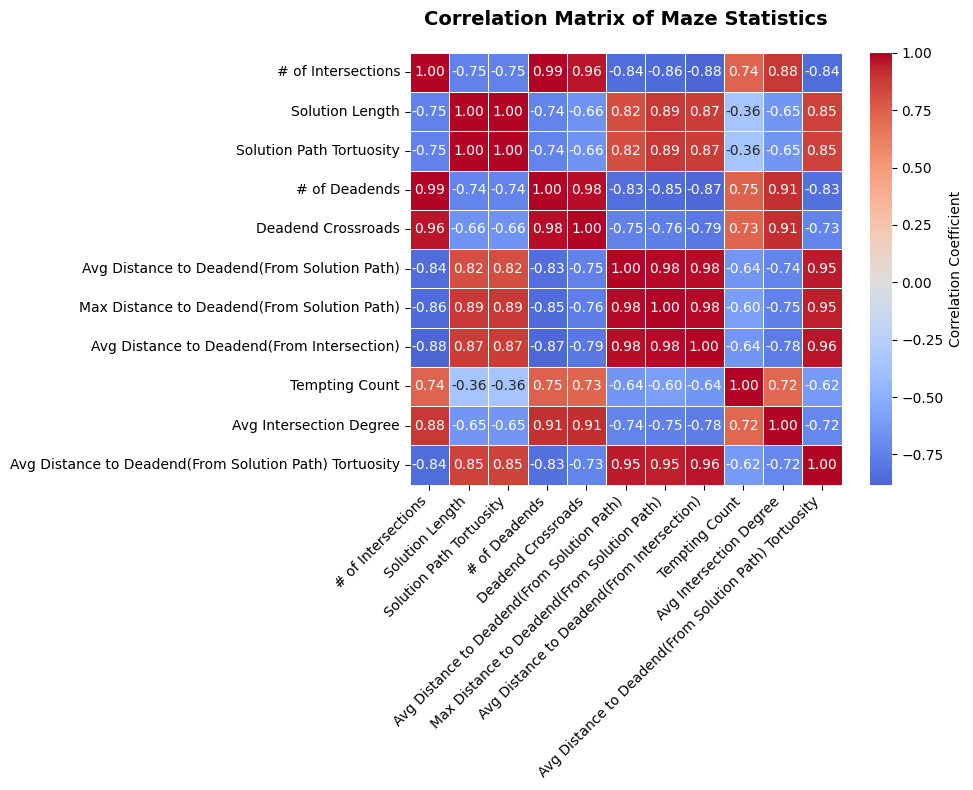

In [122]:
stats_df = metric_df.copy()
numeric_stats = stats_df.select_dtypes(include='number')
numeric_stats = numeric_stats.drop(columns=['Shortest Possible Solution'])

corr_matrix = numeric_stats.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title('Correlation Matrix of Maze Statistics', pad=20, fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

### PCA on Maze Metrics

In [123]:
copy_df = metric_df.copy()
features = copy_df.drop(columns=['Maze Type', 'Size'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['Maze Type'] = copy_df['Maze Type']

explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]:.2%}")
print(f"Explained variance by PC2: {explained_variance[1]:.2%}")
print(f"Total explained variance: {explained_variance.sum():.2%}")

Explained variance by PC1: 82.00%
Explained variance by PC2: 10.22%
Total explained variance: 92.23%


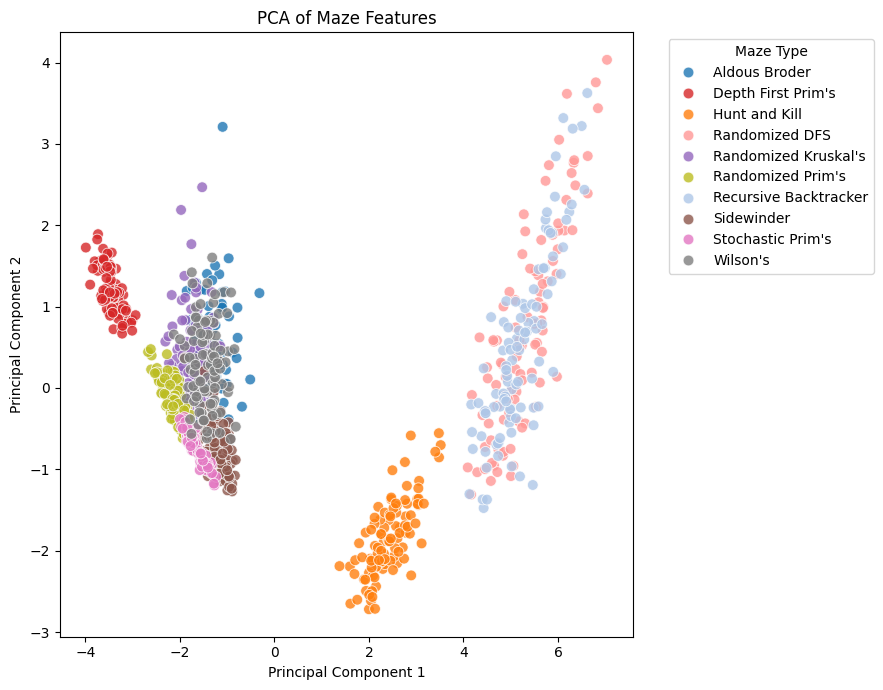

In [124]:
plt.figure(figsize=(9, 7))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='Maze Type',
    palette=maze_colors,
    s=60,
    alpha=0.8
)

plt.title('PCA of Maze Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Maze Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

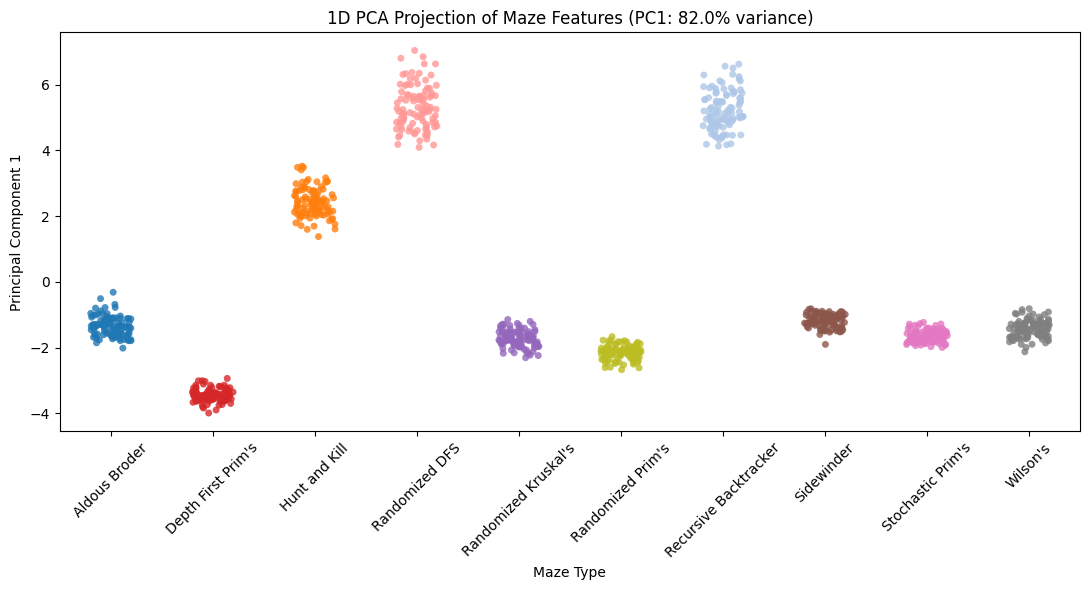

In [125]:
pca_1d = PCA(n_components=1)
pc1 = pca_1d.fit_transform(scaled_features)

pca_df = pd.DataFrame({
    'PC1': pc1.flatten(),
    'Maze Type': copy_df["Maze Type"]  
})

plt.figure(figsize=(11, 6))
sns.stripplot(
    data=pca_df,
    x='Maze Type',
    y='PC1',  
    hue='Maze Type',
    palette=maze_colors,
    jitter=0.2,
    alpha=0.8,
    dodge=False,
    legend=False
)

plt.title(f'1D PCA Projection of Maze Features (PC1: {pca_1d.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel('Principal Component 1')
plt.xlabel('Maze Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

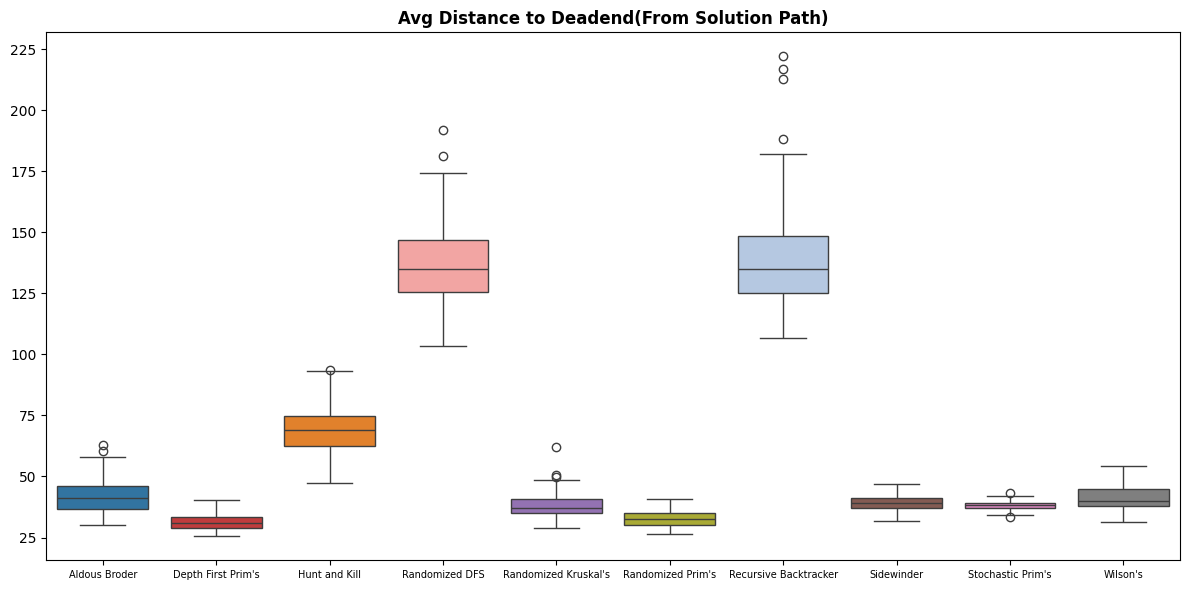

In [126]:
box_plot_metric("Avg Distance to Deadend(From Solution Path)")

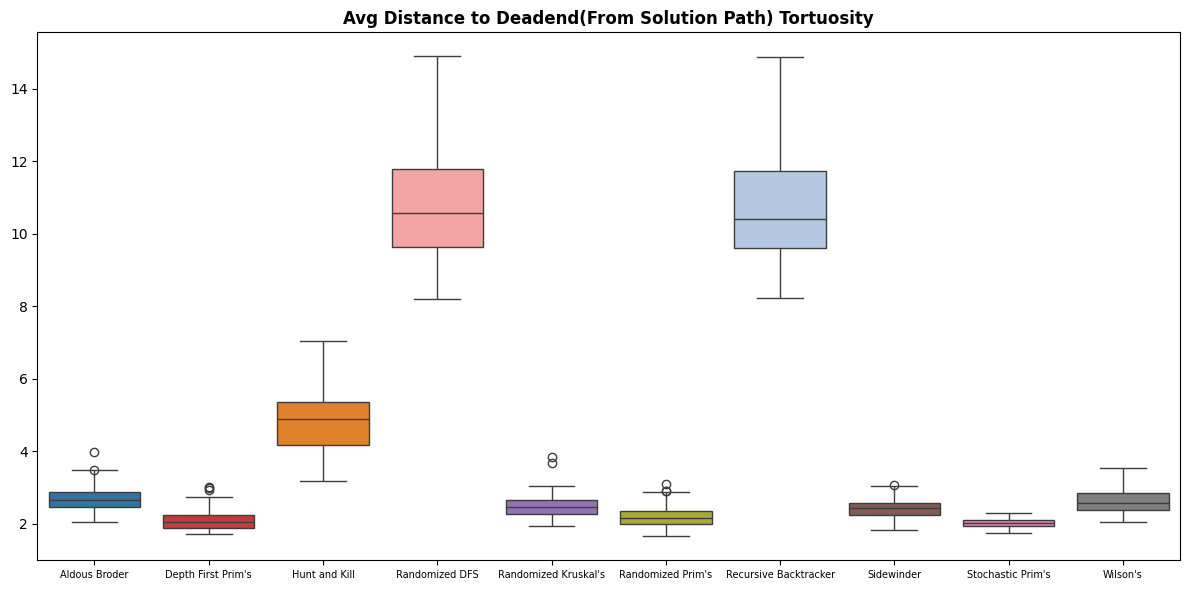

In [127]:
box_plot_metric("Avg Distance to Deadend(From Solution Path) Tortuosity")

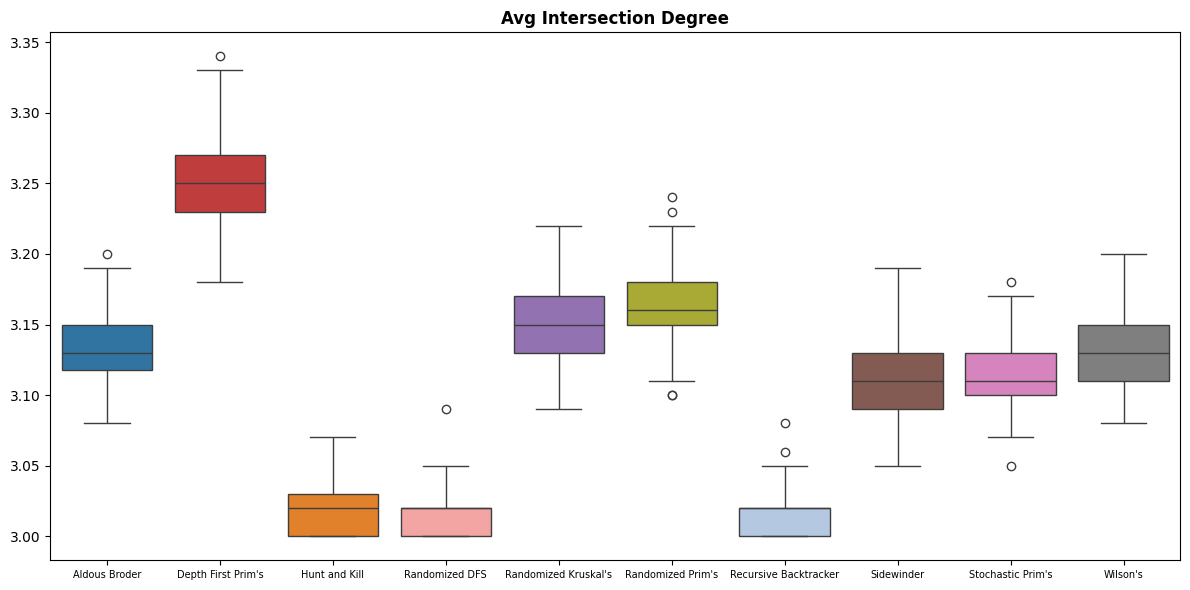

In [128]:
box_plot_metric("Avg Intersection Degree")

### Solution Statistics Analysis

In [129]:
solution_df.columns

Index(['Maze Type', 'Size', 'Solver', 'Visited Nodes', 'Solution Path Length',
       'Excess Steps', 'Exploration Ratio', 'Visited Dead Ends',
       'Visited Intersections', 'Dead End Coverage', 'Intersection Coverage'],
      dtype='object')

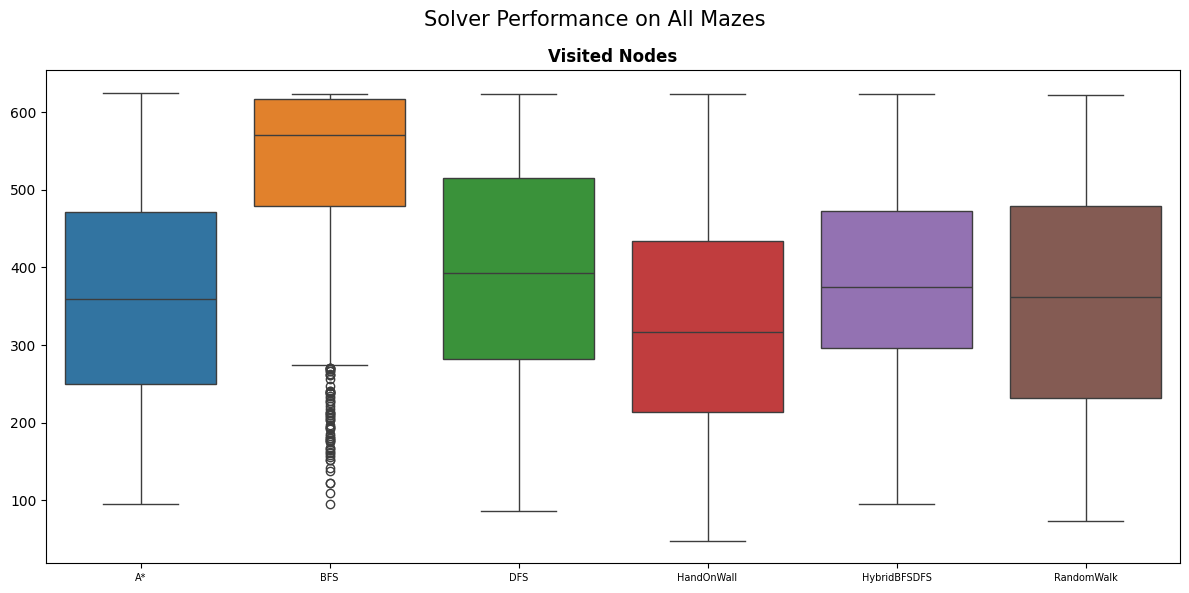

In [130]:
box_plot_solution("Visited Nodes")

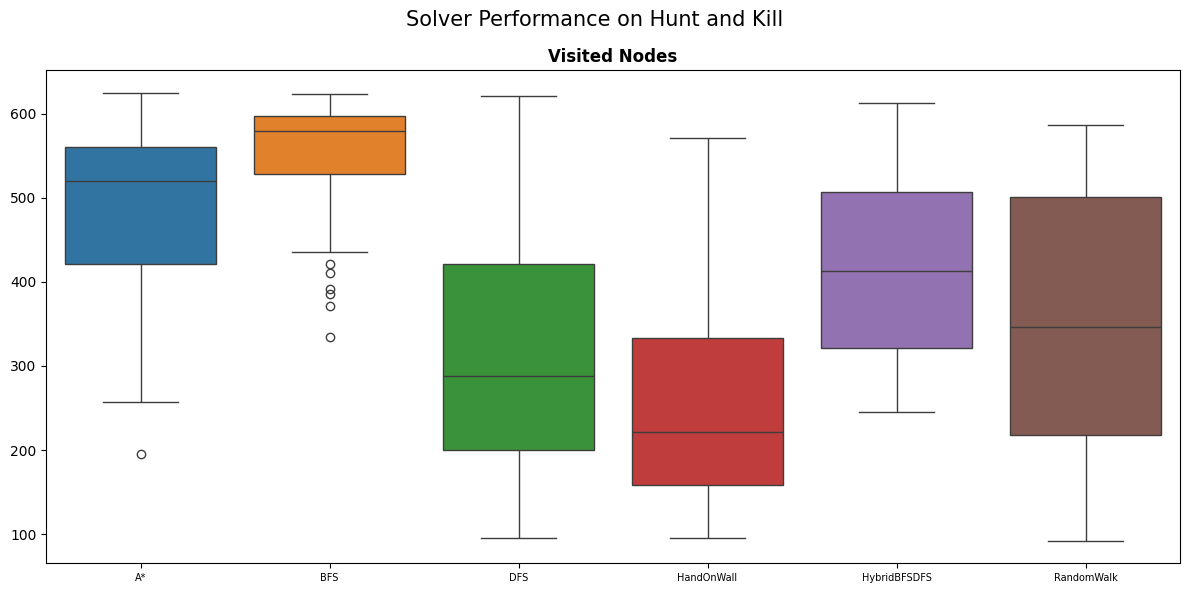

In [131]:
box_plot_solution("Visited Nodes", "Hunt and Kill")

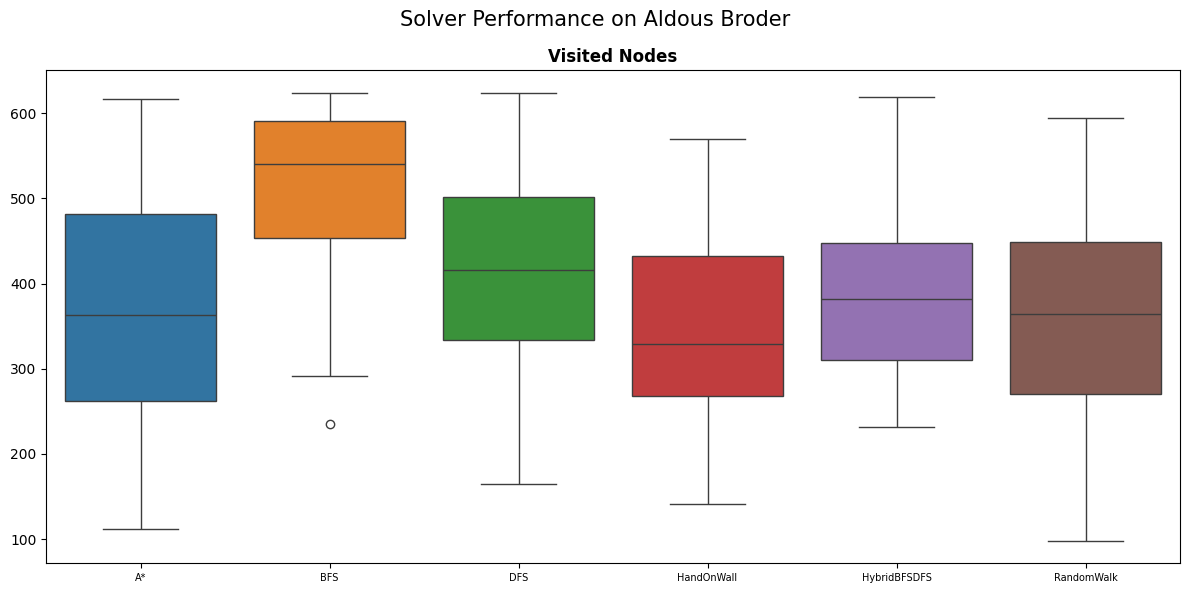

In [132]:
box_plot_solution("Visited Nodes", "Aldous Broder")

In [133]:
pivot_tables_solution("Visited Nodes")

Comparison Table of Visited Nodes for each Solver:



Solver,A*,BFS,DFS,HandOnWall,HybridBFSDFS,RandomWalk
Maze Type,,,,,,
Randomized Prim's,395.60,621.10,348.95,342.81,436.00,338.72
Depth First Prim's,341.44,619.39,349.19,331.63,439.09,320.61
Sidewinder,415.05,597.28,466.85,142.08,438.03,335.46
Aldous Broder,376.94,514.22,417.38,343.29,384.58,357.18
Hunt and Kill,486.89,555.12,318.09,252.05,416.80,353.85
Wilson's,366.64,505.85,429.17,349.30,367.20,344.92
Randomized Kruskal's,365.41,532.35,363.98,352.78,375.19,370.38
Stochastic Prim's,225.07,557.97,459.19,300.02,369.50,337.01
Recursive Backtracker,350.81,376.91,385.83,398.92,321.06,412.11


In [134]:
pivot_tables_solution("Exploration Ratio")

Comparison Table of Exploration Ratio for each Solver:



Solver,A*,BFS,DFS,HandOnWall,HybridBFSDFS,RandomWalk
Maze Type,,,,,,
Randomized Prim's,6.565078,11.046560,5.746843,5.648565,7.462266,5.550316
Depth First Prim's,5.580039,11.132606,5.825006,5.512338,7.592020,5.283155
Stochastic Prim's,3.673525,10.596175,8.539042,5.224033,6.680108,6.000325
Sidewinder,5.890236,9.095445,6.852317,1.398448,6.419790,4.718188
Randomized Kruskal's,3.858243,6.315299,4.024049,3.851476,4.195078,4.149880
Wilson's,3.844968,5.851359,4.851066,3.731634,3.979505,3.722174
Aldous Broder,3.779980,5.784270,4.559968,3.566837,4.135623,3.734480
Hunt and Kill,3.874400,4.675566,2.178944,1.563902,3.305645,2.659744
Randomized DFS,0.479235,0.625133,0.951858,0.965582,0.420196,0.923737


In [135]:
pivot_tables_solution("Dead End Coverage")

Comparison Table of Dead End Coverage for each Solver:



Solver,A*,BFS,DFS,HandOnWall,HybridBFSDFS,RandomWalk
Maze Type,,,,,,
Randomized Prim's,0.5595,0.9906,0.5324,0.5059,0.6555,0.5026
Depth First Prim's,0.4475,0.9885,0.5429,0.4903,0.6640,0.4742
Aldous Broder,0.5620,0.8080,0.6404,0.4860,0.5675,0.5053
Sidewinder,0.6189,0.9384,0.7096,0.1527,0.6531,0.4877
Wilson's,0.5405,0.7889,0.6786,0.4994,0.5459,0.4918
Randomized Kruskal's,0.5397,0.8338,0.5284,0.5055,0.5518,0.5344
Hunt and Kill,0.7226,0.8579,0.4721,0.3163,0.5975,0.4803
Stochastic Prim's,0.2126,0.8601,0.7310,0.4383,0.5285,0.5021
Recursive Backtracker,0.4309,0.4904,0.4313,0.4547,0.3154,0.4760


In [136]:
pivot_tables_solution("Intersection Coverage")

Comparison Table of Intersection Coverage for each Solver:



Solver,A*,BFS,DFS,HandOnWall,HybridBFSDFS,RandomWalk
Maze Type,,,,,,
Randomized Prim's,0.7141,0.9982,0.5969,0.6000,0.7458,0.5934
Depth First Prim's,0.6519,0.9976,0.5799,0.5791,0.7496,0.5620
Hunt and Kill,0.8158,0.9160,0.5606,0.4727,0.7355,0.6150
Aldous Broder,0.6404,0.8436,0.6965,0.6062,0.6606,0.6271
Sidewinder,0.7012,0.9673,0.7873,0.2791,0.7489,0.5787
Randomized Kruskal's,0.6264,0.8738,0.6371,0.6221,0.6482,0.6534
Wilson's,0.6250,0.8289,0.6954,0.6156,0.6267,0.6080
Stochastic Prim's,0.4928,0.9248,0.7400,0.5219,0.6472,0.5763
Recursive Backtracker,0.4859,0.5309,0.5675,0.5949,0.4330,0.6158


In [137]:
ranking_table_solution("HandOnWall")

Ranked metrics for solver 'HandOnWall':



,Visited Nodes,Solution Path Length,Excess Steps,Exploration Ratio,Dead End Coverage,Intersection Coverage
Maze Type,,,,,,
Sidewinder,1,4,1,3,1,1
Hunt and Kill,2,8,2,4,2,2
Stochastic Prim's,3,1,5,8,3,3
Recursive Backtracker,9,10,3,1,4,5
Depth First Prim's,4,2,9,9,7,4
Randomized DFS,10,9,4,2,5,7
Aldous Broder,6,7,6,5,6,8
Wilson's,7,6,7,6,8,9
Randomized Prim's,5,3,10,10,10,6


In [138]:
ranking_table_solution("A*")

Ranked metrics for solver 'A*':



,Visited Nodes,Solution Path Length,Excess Steps,Exploration Ratio,Dead End Coverage,Intersection Coverage
Maze Type,,,,,,
Stochastic Prim's,1,1,3,3,1,3
Randomized DFS,2,9,1,1,2,1
Recursive Backtracker,4,10,2,2,3,2
Depth First Prim's,3,2,4,8,4,7
Randomized Kruskal's,5,5,6,6,5,5
Wilson's,6,6,5,5,6,4
Aldous Broder,7,7,7,4,8,6
Randomized Prim's,8,3,8,10,7,9
Sidewinder,9,4,9,9,9,8


In [139]:
ranking_table_solution("HybridBFSDFS")

Ranked metrics for solver 'HybridBFSDFS':



,Visited Nodes,Solution Path Length,Excess Steps,Exploration Ratio,Dead End Coverage,Intersection Coverage
Maze Type,,,,,,
Randomized DFS,1,9,1,1,1,1
Recursive Backtracker,2,10,2,2,2,2
Wilson's,3,6,3,4,4,3
Stochastic Prim's,4,1,7,8,3,4
Randomized Kruskal's,5,5,4,6,5,5
Aldous Broder,6,7,5,5,6,6
Hunt and Kill,7,8,6,3,7,7
Sidewinder,9,4,8,7,8,9
Randomized Prim's,8,3,9,9,9,8


### Solution Statistics Analysis

In [140]:
loop_solution_df.columns

Index(['Maze Type', 'Size', 'Loop Density', 'Solver', 'Visited Nodes',
       'Solution Path Length', 'Excess Steps', 'Exploration Ratio',
       'Visited Dead Ends', 'Visited Intersections', 'Dead End Coverage',
       'Intersection Coverage'],
      dtype='object')

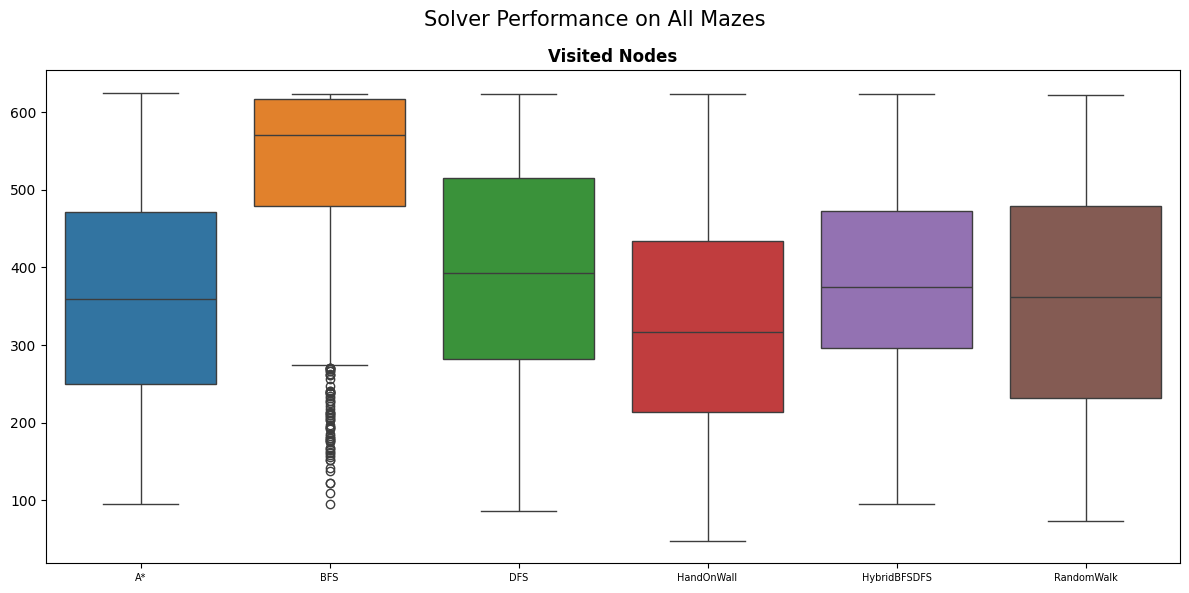

In [141]:
box_plot_solution("Visited Nodes")

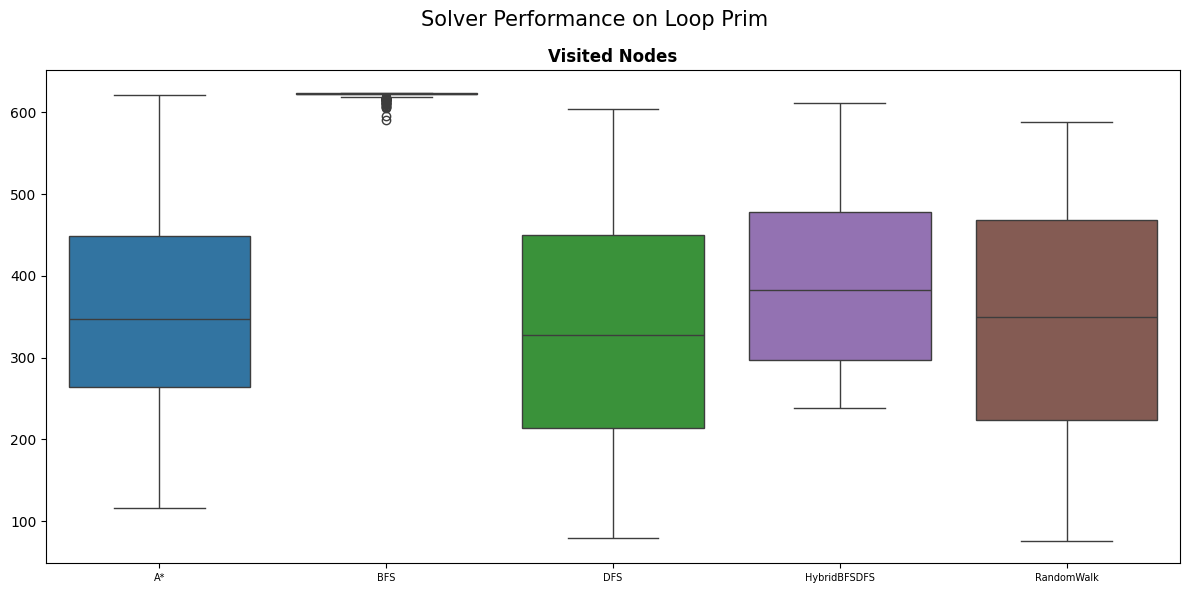

In [142]:
box_plot_loop_solution("Visited Nodes", "Loop Prim")

In [143]:
ranking_table_loop_solution("HybridBFSDFS")

Ranked metrics for solver 'HybridBFSDFS' (grouped by Maze Type):



Visited Nodes  Solution Path Length  \
Maze Type          Loop Density                                        
Loop Hunt and Kill 0.00                      4                     4   
                   0.01                      3                     3   
                   0.10                      2                     2   
                   0.25                      1                     1   
Loop Prim          0.00                      4                     4   
                   0.01                      3                     3   
                   0.10                      2                     2   
                   0.25                      1                     1   

                                 Excess Steps  Exploration Ratio  \
Maze Type          Loop Density                                    
Loop Hunt and Kill 0.00                     4                  1   
                   0.01                     3                  2   
                   0.10                     2                  3   
                   0.25                     1                  4   
Loop Prim          0.00                     4                  4   
                   0.01                     3                  3   
                   0.10                     2                  2   
                   0.25                     1                  1   

                                 Visited Dead Ends  Visited Intersections  \
Maze Type          Loop Density                                             
Loop Hunt and Kill 0.00                          4                      1   
                   0.01                          3                      2   
                   0.10                          2                      3   
                   0.25                          1                      4   
Loop Prim          0.00                          4                      2   
                   0.01                          3                      1   
                   0.10                          2                      3   
                   0.25                          1                      4   

                                 Dead End Coverage  Intersection Coverage  
Maze Type          Loop Density                                            
Loop Hunt and Kill 0.00                          4                      4  
                   0.01                          3                      3  
                   0.10                          2                      2  
                   0.25                          1                      1  
Loop Prim          0.00                          4                      4  
                   0.01                          3                      3  
                   0.10                          2                      2  
                   0.25                          1                      1

In [144]:
pivot_tables_loop_solution("Visited Nodes")

Comparison Table of Visited Nodes for each Solver:



Solver                               A*     BFS     DFS  HybridBFSDFS  \
Maze Type          Loop Density                                         
Loop Hunt and Kill 0.00          486.89  555.12  318.09        416.80   
                   0.01          479.85  557.48  339.93        406.57   
                   0.10          466.58  584.26  335.05        373.48   
                   0.25          429.62  609.10  326.75        312.67   
Loop Prim          0.00          395.60  621.10  348.95        436.00   
                   0.01          344.36  621.68  365.17        411.22   
                   0.10          355.39  622.28  303.94        385.83   
                   0.25          324.95  622.87  310.30        340.67   

Solver                           RandomWalk  
Maze Type          Loop Density              
Loop Hunt and Kill 0.00              353.85  
                   0.01              361.12  
                   0.10              357.05  
                   0.25              379.04  
Loop Prim          0.00              338.72  
                   0.01              334.93  
                   0.10              354.95  
                   0.25              351.67

### DQN Analysis

In [145]:
group_dqn_df = dqn_df.groupby("Maze Type").mean(numeric_only=True)

group_dqn_df["Converged Epoch/# of Deadends"] = group_dqn_df["Converged Epoch"] / group_dqn_df["# of Deadends"]
group_dqn_df["Converged Epoch/Avg Manhattan Distance from Deadends to Solution"] = group_dqn_df["Converged Epoch"] / group_dqn_df["Avg Manhattan Distance from Deadends to Solution"]
group_dqn_df["Converged Epoch/Avg Deadend Reward"] = group_dqn_df["Converged Epoch"] / group_dqn_df["Avg Deadend Reward"]
group_dqn_df["Converged Epoch/Solution Reward"] = group_dqn_df["Converged Epoch"] / group_dqn_df["Solution Reward"]

group_dqn_df = group_dqn_df.abs().round(2)
group_dqn_df= group_dqn_df.sort_values(by = "Converged Epoch", ascending = True)
group_dqn_df

,# of Deadends,Avg Manhattan Distance from Deadends to Solution,Avg Deadend Reward,Solution Reward,Converged Epoch,Converged Epoch/# of Deadends,Converged Epoch/Avg Manhattan Distance from Deadends to Solution,Converged Epoch/Avg Deadend Reward,Converged Epoch/Solution Reward
Maze Type,,,,,,,,,
Hunt and Kill,2.6,3.93,0.73,1.93,1285.2,494.31,326.74,1753.82,667.29
Recursive Backtracker,2.0,3.90,0.84,1.58,1625.2,812.60,416.72,1934.76,1028.61
Randomized DFS,2.9,4.90,0.69,1.97,1733.1,597.62,354.06,2511.38,879.75
Sidewinder,6.3,3.37,0.70,4.43,2738.4,434.67,813.72,3889.22,618.15
Stochastic Prim's,6.6,3.85,0.70,4.63,3121.5,472.95,811.03,4490.72,674.63
Randomized Prim's,7.4,3.72,0.73,5.38,3640.3,491.93,979.73,5017.64,676.01
Aldous Broder,6.8,4.33,0.71,4.81,3884.1,571.19,897.08,5503.12,807.17
Wilson's,6.8,3.82,0.72,4.91,4115.3,605.19,1077.81,5684.90,838.83
Depth First Prim's,7.8,3.68,0.71,5.52,4225.9,541.78,1148.75,5948.62,765.15


In [146]:
ascending = {
    "Converged Epoch": True,
    "# of Deadends": True,
    "Avg Manhattan Distance from Deadends to Solution": True,
    "Avg Deadend Reward": True,
    "Solution Reward": True,
    "Converged Epoch/# of Deadends": True,
    "Converged Epoch/Avg Manhattan Distance from Deadends to Solution": True,
    "Converged Epoch/Avg Deadend Reward": True,
    "Converged Epoch/Solution Reward": True
}

ranked_dqn_df = group_dqn_df.rank(
    axis=0,
    method='min',
    ascending=[ascending.get(col, True) for col in group_dqn_df.columns]
).astype(int)

ranked_dqn_df = ranked_dqn_df.sort_values(by="Converged Epoch", ascending=True)

ranked_dqn_df

,# of Deadends,Avg Manhattan Distance from Deadends to Solution,Avg Deadend Reward,Solution Reward,Converged Epoch,Converged Epoch/# of Deadends,Converged Epoch/Avg Manhattan Distance from Deadends to Solution,Converged Epoch/Avg Deadend Reward,Converged Epoch/Solution Reward
Maze Type,,,,,,,,,
Hunt and Kill,2,7,7,2,1,4,1,1,2
Recursive Backtracker,1,6,10,1,2,10,3,2,10
Randomized DFS,3,10,1,3,3,7,2,3,9
Sidewinder,4,1,2,4,4,1,5,4,1
Stochastic Prim's,5,5,2,5,5,2,4,5,3
Randomized Prim's,9,3,7,9,6,3,7,6,4
Aldous Broder,6,9,4,6,7,6,6,7,6
Wilson's,6,4,6,7,8,8,9,8,7
Depth First Prim's,10,2,4,10,9,5,10,9,5


In [148]:
ascending = {
    "Converged Epoch": True,
    "# of Deadends": True,
    "Avg Manhattan Distance from Deadends to Solution": True,
    "Avg Deadend Reward": True,
    "Solution Reward": True,
    "Converged Epoch/# of Deadends": True,
    "Converged Epoch/Avg Manhattan Distance from Deadends to Solution": True,
    "Converged Epoch/Avg Deadend Reward": True,
    "Converged Epoch/Solution Reward": True
}

ranked_dqn_df = group_dqn_df.rank(
    axis=0,
    method='min',
    ascending=[ascending.get(col, True) for col in group_dqn_df.columns]
).astype(int)

ranked_dqn_df = ranked_dqn_df.sort_values(by="Converged Epoch/Avg Deadend Reward", ascending=True)

ranked_dqn_df

,# of Deadends,Avg Manhattan Distance from Deadends to Solution,Avg Deadend Reward,Solution Reward,Converged Epoch,Converged Epoch/# of Deadends,Converged Epoch/Avg Manhattan Distance from Deadends to Solution,Converged Epoch/Avg Deadend Reward,Converged Epoch/Solution Reward
Maze Type,,,,,,,,,
Hunt and Kill,2,7,7,2,1,4,1,1,2
Recursive Backtracker,1,6,10,1,2,10,3,2,10
Randomized DFS,3,10,1,3,3,7,2,3,9
Sidewinder,4,1,2,4,4,1,5,4,1
Stochastic Prim's,5,5,2,5,5,2,4,5,3
Randomized Prim's,9,3,7,9,6,3,7,6,4
Aldous Broder,6,9,4,6,7,6,6,7,6
Wilson's,6,4,6,7,8,8,9,8,7
Depth First Prim's,10,2,4,10,9,5,10,9,5
